In [1]:
import os
os.getcwd()


'c:\\Users\\user\\Desktop\\GitHub\\crispr-variant-analysis\\notebooks'

In [2]:
import os
os.listdir("../data")

['.gitkeep', 'data']

In [3]:
df = pd.read_csv("../data/data/variants_demo.tsv", sep="\t")
df.head()

NameError: name 'pd' is not defined

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/data/variants_demo.tsv", sep="\t")
df.head()

,variant_id,gene,chrom,pos,ref,alt,consequence,impact,allele_freq
0,var1,TP53,17,7676153,C,T,missense_variant,MODERATE,0.0012
1,var2,BRCA1,17,43045729,A,G,stop_gained,HIGH,0.0001
2,var3,EGFR,7,55249071,G,A,synonymous_variant,LOW,0.0120
3,var4,CFTR,7,117559593,T,C,splice_region_variant,MODERATE,0.0008
4,var5,HBB,11,5227002,A,T,missense_variant,MODERATE,0.0045


In [13]:
df["impact"].value_counts()

impact
MODERATE    7
HIGH        2
LOW         1
Name: count, dtype: int64

In [7]:
df["consequence"].value_counts()

consequence
missense_variant         6
stop_gained              2
synonymous_variant       1
splice_region_variant    1
Name: count, dtype: int64

In [10]:
df.groupby("gene")["variant_id"].count().sort_values(ascending=False)

gene
APOE     1
BRCA1    1
CFTR     1
EGFR     1
HBB      1
KRAS     1
LMNA     1
MTHFR    1
PCSK9    1
TP53     1
Name: variant_id, dtype: int64

In [14]:
df["allele_freq"].describe()
rare = df[df["allele_freq"] < 0.01].copy()
rare[["variant_id", "gene", "consequence", "impact", "allele_freq"]].sort_values("allele_freq")

,variant_id,gene,consequence,impact,allele_freq
1,var2,BRCA1,stop_gained,HIGH,0.0001
8,var9,PCSK9,stop_gained,HIGH,0.0002
9,var10,LMNA,missense_variant,MODERATE,0.0006
3,var4,CFTR,splice_region_variant,MODERATE,0.0008
0,var1,TP53,missense_variant,MODERATE,0.0012
5,var6,KRAS,missense_variant,MODERATE,0.0021
4,var5,HBB,missense_variant,MODERATE,0.0045


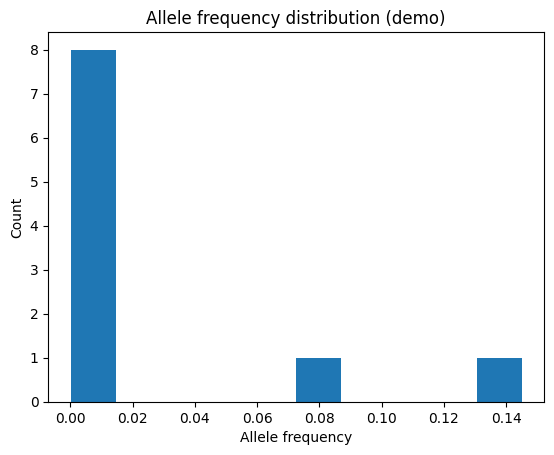

In [12]:
df["allele_freq"].plot(kind="hist", bins=10)
plt.title("Allele frequency distribution (demo)")
plt.xlabel("Allele frequency")
plt.ylabel("Count")
plt.show()